In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

In [2]:
def clean_xs_ys(xs, ys):
    non_nan = (~np.isnan(xs)) & (~np.isnan(ys)) & (xs > 0.1) & (ys > 0.1)
    xs, ys = xs[non_nan], ys[non_nan]
    return xs, ys

2d hist of all locations

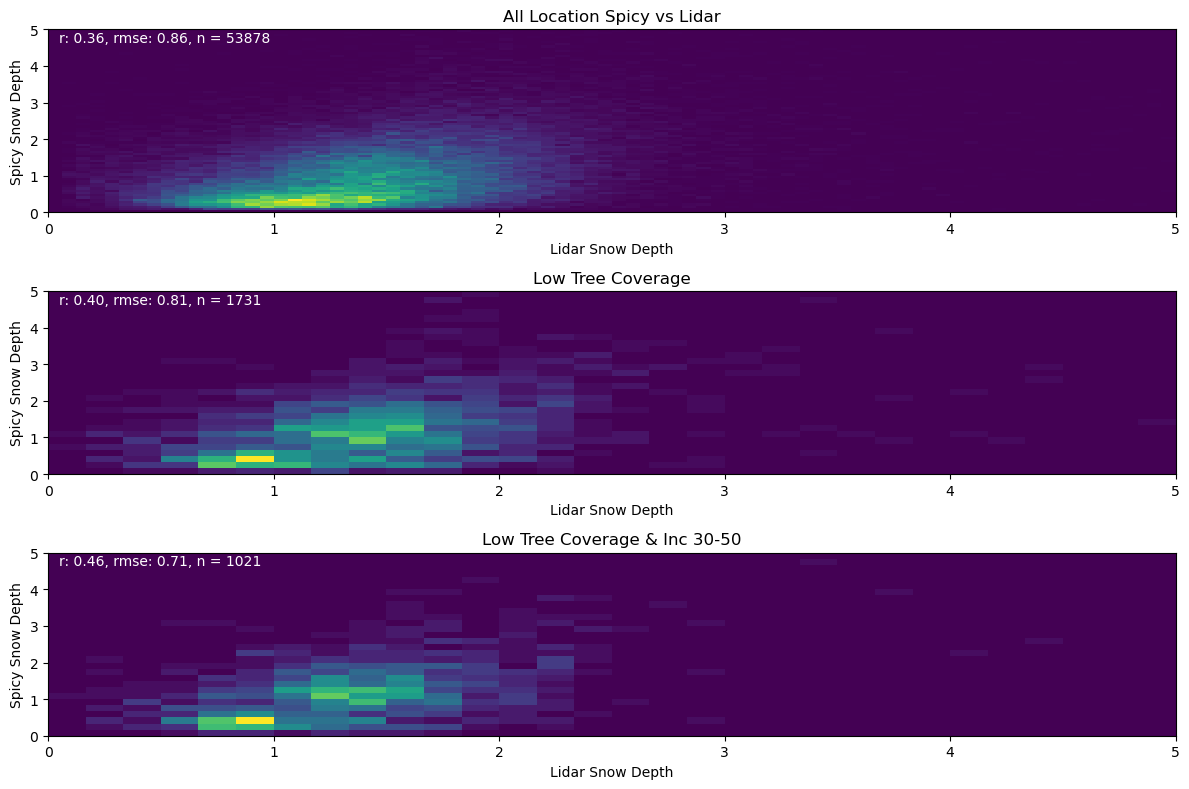

In [24]:
fig, axes = plt.subplots(3, figsize = (12, 8))

fig_dir = Path('../../images/')
d_dir = Path('../../Lidar_s1_stacks/')

full_xs = []
full_ys = []
for fp in d_dir.glob('*.nc'):
    loc_name = fp.stem.replace('.sub', '')
    ds = xr.open_dataset(fp)
    if loc_name == 'Frasier_2020-02-11':
        ds = ds.sel(time = '2020-02-16T13:09:43.000000000')
    else:
        ds = ds.sel(time = ds.attrs['lidar-flight-time'], method = 'nearest')
    xs = ds['lidar-sd'].data.ravel()
    ys = ds['snow_depth'].data.ravel()
    xs, ys = clean_xs_ys(xs, ys)
    full_xs.extend(xs)
    full_ys.extend(ys)
ax = axes[0]
ax.hist2d(full_xs, full_ys, bins = 80, range = [[0,5],[0,5]])
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
r, p = pearsonr(full_xs, full_ys)
rmse = mean_squared_error(full_xs, full_ys, squared=False)
ax.text(s = f'r: {r:.2f}, rmse: {rmse:.2f}, n = {len(full_xs)}', x = 0.01, y = 0.99, ha = 'left', va = 'top', transform=ax.transAxes, color = 'white')
ax.set_title('All Location Spicy vs Lidar')

full_xs = []
full_ys = []
for fp in d_dir.glob('*.nc'):
    loc_name = fp.stem.replace('.sub', '')
    ds = xr.open_dataset(fp)
    if loc_name == 'Frasier_2020-02-11':
        ds = ds.sel(time = '2020-02-16T13:09:43.000000000')
    else:
        ds = ds.sel(time = ds.attrs['lidar-flight-time'], method = 'nearest')
    ds = ds.where(ds['lidar-vh'] < 0.02)
    xs = ds['lidar-sd'].data.ravel()
    ys = ds['snow_depth'].data.ravel()
    xs, ys = clean_xs_ys(xs, ys)
    full_xs.extend(xs)
    full_ys.extend(ys)
ax = axes[1]
ax.hist2d(full_xs, full_ys, bins = 30, range = [[0,5],[0,5]])
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
r, p = pearsonr(full_xs, full_ys)
rmse = mean_squared_error(full_xs, full_ys, squared=False)
ax.text(s = f'r: {r:.2f}, rmse: {rmse:.2f}, n = {len(full_xs)}', x = 0.01, y = 0.99, ha = 'left', va = 'top', transform=ax.transAxes, color = 'white')
ax.set_title('Low Tree Coverage')

full_xs = []
full_ys = []
for fp in d_dir.glob('*.nc'):
    loc_name = fp.stem.replace('.sub', '')
    ds = xr.open_dataset(fp)
    if loc_name == 'Frasier_2020-02-11':
        ds = ds.sel(time = '2020-02-16T13:09:43.000000000')
    else:
        ds = ds.sel(time = ds.attrs['lidar-flight-time'], method = 'nearest')
    ds = ds.sel(band = 'inc')
    ds = ds.where((ds['lidar-vh'] < 0.02) & (ds['s1'] < np.deg2rad(50)) & (ds['s1'] > np.deg2rad(30)))
    xs = ds['lidar-sd'].data.ravel()
    ys = ds['snow_depth'].data.ravel()
    xs, ys = clean_xs_ys(xs, ys)
    full_xs.extend(xs)
    full_ys.extend(ys)
ax = axes[2]
ax.hist2d(full_xs, full_ys, bins = 30, range = [[0,5],[0,5]])
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
r, p = pearsonr(full_xs, full_ys)
rmse = mean_squared_error(full_xs, full_ys, squared=False)
ax.text(s = f'r: {r:.2f}, rmse: {rmse:.2f}, n = {len(full_xs)}', x = 0.01, y = 0.99, ha = 'left', va = 'top', transform=ax.transAxes, color = 'white')
ax.set_title('Low Tree Coverage & Inc 30-50')

for ax in axes:
    ax.set_ylabel('Spicy Snow Depth')
    ax.set_xlabel('Lidar Snow Depth')

plt.tight_layout()
plt.savefig(fig_dir.joinpath('2d-hist', f"all_subsets.png"))

2d histogram for each location

In [3]:
fig_dir = Path('../../images/')
d_dir = Path('../../SnowEx-Data/')
for fp in d_dir.glob('*.nc'):
    loc_name = fp.stem.replace('.sub', '')
    ds = xr.open_dataset(fp)
    if loc_name == 'Frasier_2020-02-11':
        ds = ds.sel(time = '2020-02-16T13:09:43.000000000')
    else:
        ds = ds.sel(time = ds.attrs['lidar-flight-time'], method = 'nearest')
    fig, ax = plt.subplots(figsize = (12, 8))
    xs = ds['lidar-sd'].data.ravel()
    ys = ds['snow_depth'].data.ravel()
    xs, ys = clean_xs_ys(xs, ys)
    ax.hist2d(xs, ys, bins = 75)
    r, p = pearsonr(xs, ys)
    ax.text(s = f'r: {r:.2f}. n = {len(xs)}', x = 0.01, y = 0.99, ha = 'left', va = 'top', transform=ax.transAxes, color = 'white')
    ax.set_title(f'{loc_name}')
    plt.tight_layout()
    fig_dir.joinpath('2d-hist', loc_name).mkdir(exist_ok=True)
    plt.savefig(fig_dir.joinpath('2d-hist', loc_name, f"{loc_name}_full.png"))
    plt.close()

2d histogram for each location binned by snow depth, forest cover, and vegetation height

In [3]:
fig_dir = Path('../../images/')
d_dir = Path('../../Lidar_s1_stacks/')
for fp in d_dir.glob('*.nc'):
    loc_name = fp.stem
    ds = xr.open_dataset(fp)
    if loc_name == 'Frasier_2020-02-11':
        ds = ds.sel(time = '2020-02-16T13:09:43.000000000')
    else:
        ds = ds.sel(time = ds.attrs['lidar-flight-time'], method = 'nearest')
    ds = ds.sel(band = 'inc')
    ds['s1'] = xr.apply_ufunc(np.rad2deg, ds['s1'])
    for data_var, title in zip(['lidar-sd', 'fcf', 'lidar-vh', 's1'], ['Total Snow Depth', 'Forest Cover Fraction', 'Vegetation Height', 'Incidence Angle']):
        bins = np.round(np.linspace(*ds[data_var].quantile([0.01, 0.99]), 7), 2)
        cor_bins = ds.groupby_bins(data_var, bins)
        nrows = 2
        ncols = int(np.ceil(len(cor_bins.groups)/nrows))
        fig, axes = plt.subplots(nrows, ncols, figsize = (12, 8))
        for (groupname, sub), ax in zip(sorted(cor_bins), axes.ravel()):
            xs = sub['lidar-sd'].data.ravel()
            ys = sub['snow_depth'].data.ravel()
            xs, ys = clean_xs_ys(xs, ys)
            if len(xs) < 2:
                continue
            ax.hist2d(xs, ys, bins = 75)
            r, p = pearsonr(xs, ys)
            ax.text(s = f'r: {r:.2f}. n = {len(xs)}', x = 0.01, y = 0.99, ha = 'left', va = 'top', transform=ax.transAxes, color = 'white')
            ax.set_title(f'{groupname.left}-{groupname.right}')
        plt.suptitle(f'{loc_name} - {title}')
        plt.tight_layout()
        fig_dir.joinpath('2d-hist', loc_name).mkdir(exist_ok=True)
        plt.savefig(fig_dir.joinpath('2d-hist', loc_name, f"{title.replace(' ','_')}.png"))
        plt.close()